(array([0, 1, 2, 3]),
 [Text(0, 0, 'GINConvNet'),
  Text(1, 0, 'GATNet'),
  Text(2, 0, 'GAT_GCN'),
  Text(3, 0, 'GCNNet')])

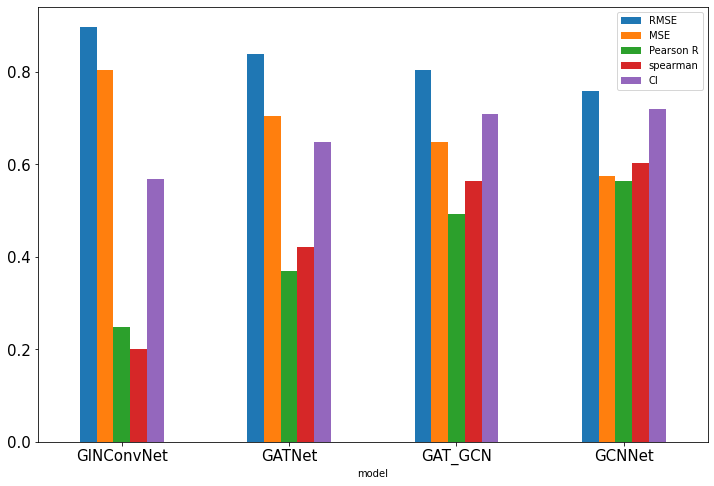

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('CovidResult.csv')
df.set_index('model', inplace=True)
ax= df.plot.bar(figsize=(12,8),fontsize = 15)
plt.xticks(rotation=0)


    Unnamed: 0                  CID  \
0          294  TAM-UNI-d1c3dd9f-12   
1          224  DAN-LON-a5fc619e-10   
2          281   MAT-POS-02ae579f-2   
3            1   JOH-MSK-46727e7b-1   
4          325   JAN-GHE-5a013bed-1   
..         ...                  ...   
66         244   MAT-POS-044491d2-2   
67         183   ALP-POS-c59291d4-2   
68           5   MAT-POS-23a8a11a-1   
69         242  JAN-GHE-83b26c96-22   
70         124  LON-WEI-adc59df6-47   

                                               SMILES  affinity       GIN  \
0        O=C(CCl)N1CCN(Cc2cccc(CNC(=O)N3CCOCC3)c2)CC1  4.298281  5.306024   
1       O=C(CCl)N1CCN(Cc2cccc(Cl)c2)C[C@@H]1Cc1ccccc1  4.724672  5.172236   
2                 O=C(Nc1cccnc1)NC1(C#Cc2c[nH]cn2)CC1  4.351297  4.802503   
3   CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...  7.587379  5.757552   
4                      Cc1nnn(NC(=O)Cc2cccc(Cl)c2)c1C  4.134562  4.677783   
..                                                ...       ...      

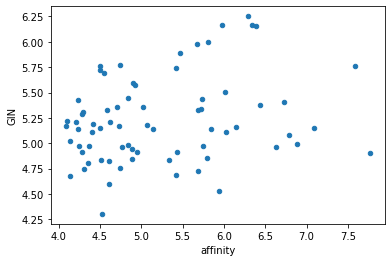

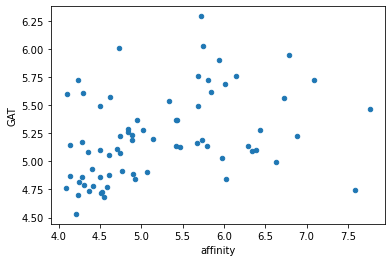

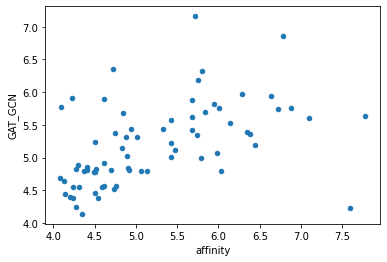

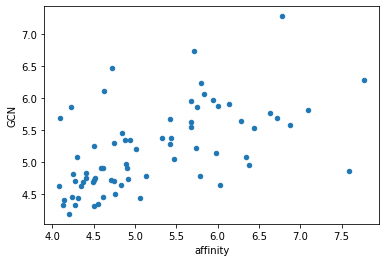

In [43]:
df1 = pd.read_csv('covid2DTA.csv')
import re

def context2array(context):
    return np.matrix([list(map(float, re.split('\s+', ln.strip())))
        for ln in context.splitlines() if ln.strip()])

GIN = '5.306024 5.1722364 4.802503  5.757552  4.6777825 5.188532  5.1070957 5.763793  4.9155574 5.3568783 5.434638  5.3324413 4.8306756 5.2116675 4.7282763 5.28396   5.4095354 5.724992  4.9157143 5.112459  4.3037624 6.160728  5.1751213 4.9735928 4.688268  5.077446  5.4442625 5.773248 4.841549  5.5098753 5.214576  5.1456466 5.3750997 4.914937  4.903309 5.1522455 6.1683164 5.74654   4.967133  5.5794597 5.6932716 4.9709573 4.596593  4.8593173 6.167233  4.984527  5.9766684 5.1411176 4.5294094 4.94718   5.1460896 5.9973216 5.157624  5.0244637 5.1757913 5.1414385 4.7500296 5.3410454 4.9593005 4.837528  4.9771876 6.252474  5.4276066 5.357235  5.215901  4.757527  5.330851  5.5966907 4.991762  4.821226 5.8929644'
GAT = '5.60895   6.0092354 5.0885577 4.7439013 4.8663125 4.781413  4.844704 5.098309  5.369792  5.285089  5.1932244 5.4981737 5.540067  5.5769515 5.76047   5.1776443 5.566984  4.860424  4.860449  4.936114  4.7287445 5.1007867 4.7601843 4.8152037 5.1422634 5.947615  5.2669396 5.075906 5.189077  5.6872816 4.5322423 5.6190915 5.2782373 5.3717175 5.4659443 5.491925  5.094954  5.3715734 4.9149246 4.8441367 4.6820803 4.7351055 4.8812447 5.1372232 5.0302634 5.285598  5.165746  5.729991  5.908395 5.239026  5.7245398 5.727532  5.765034  5.1489716 4.9090996 5.1991615 4.7923923 6.2951593 4.999461  4.7144523 6.0321984 5.1407614 4.6969247 5.1144233 5.598409  5.223149  4.7750754 4.8910027 5.225214  5.059883 5.1312356'
GAT_GCN = '4.8819613 6.3543367 4.138099  4.2285986 4.6435814 4.8140044 4.794158 4.774337  5.225665  5.319905  5.3441215 5.425388  5.443729  5.8924665 5.881727  4.8249955 5.740919  4.77733   4.2478905 4.848316  4.8259816 5.359051  4.680959  4.552461  5.5718637 6.8627524 5.6844296 4.518141 5.018933  5.753874  4.3940535 5.693901  5.185298  5.4288664 5.6348248 5.2403674 5.392395  5.003735  4.569355  4.805868  4.3838744 4.792966 4.5716333 4.993885  5.0656643 5.1445584 5.6164055 5.9047236 5.818212 5.3192687 5.6025167 6.3273497 5.5316224 4.436265  4.7890854 4.798415 4.5546155 7.159644  5.9403567 4.4516945 6.192198  5.966051  4.3766336 4.8070664 5.770362  5.372416  4.5532727 4.844966  5.7577147 4.917928 5.120369'
GCN ='5.0803323 6.4683266 4.629001  4.854499  4.3286595 4.7532744 4.636667 4.6792636 5.375999  5.1955957 5.2228756 5.5513315 5.3696213 6.1152287 5.62845   4.708591  5.688617  4.7143307 4.3173413 4.821576  4.746588 4.9537234 4.6162105 4.8039303 5.680356  7.2837105 5.4582577 4.70831 4.9722705 5.874573  4.185123  6.0614905 5.528108  5.349435  6.2854595 5.2542973 5.084498  5.2749615 4.4898863 4.731825  4.337821  4.6932583 4.4545937 4.7765307 5.1466312 4.6368437 5.9478455 5.867252  5.9765353 5.336849  5.818707  6.230347  5.9147425 4.3993764 4.4277897 4.7755227 4.4376793 6.7335153 5.7741356 4.3028193 5.862743  5.648748  4.443159 4.712255  5.684296  5.292065  4.9053597 4.9102407 5.5741625 4.912521 5.0440245'

arr_GIN = context2array(GIN)
arr_GAT = context2array(GAT)
arr_GAT_GCN = context2array(GAT_GCN)
arr_GCN = context2array(GCN)

GIN = arr_GIN.reshape(-1,1)
GAT = arr_GAT.reshape(-1,1)
GAT_GCN = arr_GAT_GCN.reshape(-1,1)
GCN = arr_GCN.reshape(-1,1)
df1['GIN'] = GIN
df1['GAT'] = GAT
df1['GAT_GCN'] = GAT_GCN
df1['GCN'] = GCN

df1.plot(kind='scatter', x='affinity', y='GIN')
df1.plot(kind='scatter', x='affinity', y='GAT')
df1.plot(kind='scatter', x='affinity', y='GAT_GCN')
df1.plot(kind='scatter', x='affinity', y='GCN')
print(df1)
